# Use Case 2: Comparing Clinical Attributes

## Step 1: Importing packages and setting up your notebook.

This use case will guide you through accessing and manipulating data from the clinical dataframe. We will explore how to retrieve clinical data, select variables for analysis, and represent interactions between those variables in a meaningful way. We will use endometrial cancer data from the CPTAC to will compare FIGO stage--a common measurement of uterine cancer stage (see the <a href="https://www.cancer.org/cancer/endometrial-cancer/detection-diagnosis-staging/staging.html">NIH</a> for more information)--with BMI to see if there is any correlation.

We will start by importing the standard data analysis libraries, plus the seaborn library for visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Our cancer data and a variety of accessory functions are provided in the cptac package.

In [2]:
import cptac
en = cptac.Endometrial()

## Step 2: Getting data

We load the dataframe for clinical results by calling the <code>en.get_clinical()</code> method. We can then select the data for the variables we are interested in from the dataframe. To see what clinical attributes are available for analysis, we will print out the column names in the clinical dataframe.

In [3]:
clinical_data = en.get_clinical()
print(clinical_data.columns)

Index(['Patient_ID', 'Proteomics_Tumor_Normal', 'Country',
       'Histologic_Grade_FIGO', 'Myometrial_invasion_Specify',
       'Histologic_type', 'Treatment_naive', 'Tumor_purity',
       'Path_Stage_Primary_Tumor-pT', 'Path_Stage_Reg_Lymph_Nodes-pN',
       'Clin_Stage_Dist_Mets-cM', 'Path_Stage_Dist_Mets-pM',
       'tumor_Stage-Pathological', 'FIGO_stage', 'LVSI', 'BMI', 'Age',
       'Diabetes', 'Race', 'Ethnicity', 'Gender', 'Tumor_Site',
       'Tumor_Site_Other', 'Tumor_Focality', 'Tumor_Size_cm',
       'Num_full_term_pregnancies'],
      dtype='object', name='Name')


For this use case, we are only interested in FIGO stage and BMI, so we will separate those out from the rest of the dataframe.

In [4]:
simplified_clinical = clinical_data[['FIGO_stage', 'BMI']]

You can get definitions for terms in the dataset by calling the <code>en.define</code> method. If you need more information, searching the term online can be helpful. The <code>en.search</code> function will open a webpage with the search results for the specified term.

In [5]:
en.define(term='FIGO_stage')
en.define(term='BMI')
#en.search('FIGO_stage') will open a browser search for FIGO_stage

Categorical classification of FIGO state (I being less severe, IV being more severe)
BMI (body mass index) of specified patient.


## Step 3: Organizing the data

For the purposes of this example, we want to simplify the FIGO stages to remove the subcategories. The following section of code renames them manually.

In [6]:
pd.set_option('mode.chained_assignment', None)
simplified_clinical.loc[simplified_clinical.FIGO_stage == 'IA', 'FIGO_stage'] = 'I'
simplified_clinical.loc[simplified_clinical.FIGO_stage == 'IB', 'FIGO_stage'] = 'I'
simplified_clinical.loc[simplified_clinical.FIGO_stage == 'IIIA', 'FIGO_stage'] = 'III'
simplified_clinical.loc[simplified_clinical.FIGO_stage == 'IIIB', 'FIGO_stage'] = 'III'
simplified_clinical.loc[simplified_clinical.FIGO_stage == 'IIIC1', 'FIGO_stage'] = 'III'
simplified_clinical.loc[simplified_clinical.FIGO_stage == 'IIIC2', 'FIGO_stage'] = 'III'
simplified_clinical.loc[simplified_clinical.FIGO_stage == 'IVB', 'FIGO_stage'] = 'IV'
figo_stage_bmi = simplified_clinical.sort_values('FIGO_stage')

## Step 4: Plot the data

FIGO stage is categorical and BMI is continuous, so we can use a histogram to see the distribution of the patient's BMI separated by cancer stage.

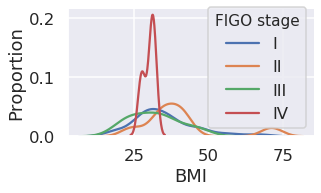

In [7]:
sns.set(style='darkgrid', context="talk")
NUM_COLORS = 12

figoHist = sns.FacetGrid(figo_stage_bmi, hue="FIGO_stage", legend_out=False, aspect=1.5)
figoHist = figoHist.map(sns.kdeplot, "BMI").add_legend(title="FIGO stage")
figoHist.set(ylabel='Proportion')
plt.show()

Another way of viewing this same data is a boxplot. In this example, we add a strip plot over the box plot to visualize each datapoint on top of the boxplot.

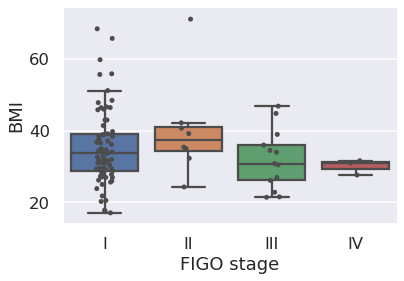

In [8]:
figoStrip = sns.boxplot(data=figo_stage_bmi, x="FIGO_stage", y="BMI", showfliers=False)
figoStrip = sns.stripplot(data=figo_stage_bmi, x="FIGO_stage", y="BMI", jitter=True, color=".3")
figoStrip.set(xlabel = "FIGO stage")
plt.show()

## Step 5: Plot other data

The same technique will work for visualizing any other variables in this dataset. As another example, we will create a similar histogram and boxplot to examine the BMI of research subjects compared to diagnosis of diabetes. Once again, we select the variables of interest from the clinical dataframe, then plot the resulting dataframe using the seaborn package.

/home/caleb/anaconda3/envs/cptac-prod/lib/python3.7/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/home/caleb/anaconda3/envs/cptac-prod/lib/python3.7/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


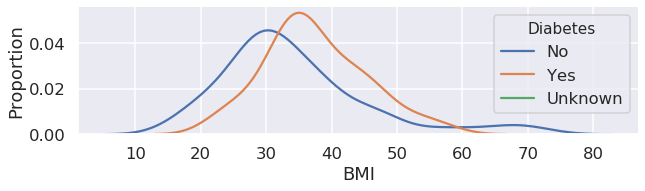

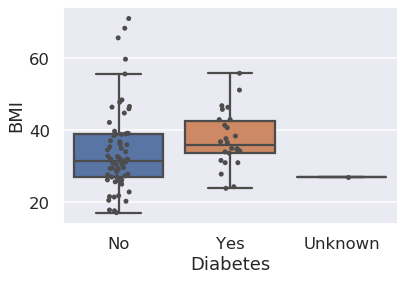

In [9]:
diabetes_bmi = clinical_data[['Diabetes', 'BMI']]

#generate histogram
diabetes_hist = sns.FacetGrid(diabetes_bmi, hue="Diabetes", legend_out=False, aspect=3)
diabetes_hist = diabetes_hist.map(sns.kdeplot, "BMI").add_legend(title="Diabetes")
diabetes_hist.set(ylabel='Proportion')
plt.show()

#generate boxplot 
diabetes_plot = sns.boxplot(data=diabetes_bmi, x="Diabetes", y="BMI", showfliers=False)
diabetes_plot = sns.stripplot(data=diabetes_bmi, x="Diabetes", y="BMI", jitter=True, color=".3")
plt.show()